In [1]:
%load_ext autoreload

%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import os.path

import scipy,scipy.spatial
import matplotlib
matplotlib.rcParams['figure.dpi'] = 100

from  data_utilities import *
# from definitions import *
# from run_train_eval_net import run_train_eval_net,run_eval_net

In [2]:
import os
GPU = "1"
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]=GPU

In [3]:
dataset_name = 'ManyTx'
dataset_path='../../orbit_rf_dataset/data/compact_pkl_datasets/'

compact_dataset = load_compact_pkl_dataset(dataset_path,dataset_name)

tx_list = compact_dataset['tx_list']
rx_list = compact_dataset['rx_list']

equalized = 0

capture_date_list = compact_dataset['capture_date_list'][0]
n_tx = len(tx_list)
n_rx = len(rx_list)
print(n_tx,n_rx)


150 18


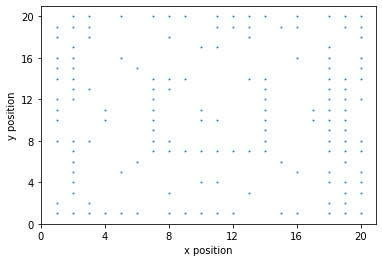

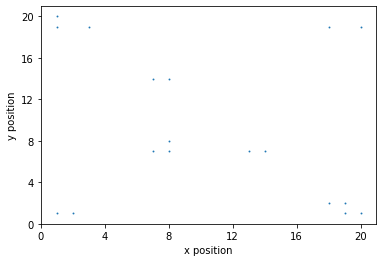

In [4]:
def plot_nodes(nl):
    x = []
    y = []
    for n in nl:
        #print(n)
        t = n.split("-")
        x.append(int(t[0]))
        y.append(int(t[1]))
    plt.scatter(x,y,s=0.8)
    plt.xticks(range(0,24,4))
    plt.yticks(range(0,24,4))
    plt.xlabel('x position')
    plt.ylabel('y position')
    return np.array([x,y]).T
    
tx_coordinates = plot_nodes(tx_list)

plt.figure()
rx_coordinates = plot_nodes(rx_list)

In [5]:
def plot_colormap(tx,rx_list,vl):
    x = []
    y = []
    print(vl)
    for n in rx_list:
        #print(n)
        t = n.split("-")
        x.append(int(t[0]))
        y.append(int(t[1]))
    plt.scatter(x,y,s=100,c=20*np.log10(vl))
    plt.xticks(range(0,24,4))
    plt.yticks(range(0,24,4))
    t = tx.split("-")
    plt.plot(int(t[0]),int(t[1]),'rx',markersize=10)
    plt.xlabel('x position')
    plt.ylabel('y position')
    plt.colorbar()

In [6]:

tx_list = ['2-3','14-7']
res = np.zeros((len(tx_list),n_rx))
for i,tx in enumerate(tx_list):
    for j,rx in enumerate(rx_list):
        dataset = merge_compact_dataset(compact_dataset,capture_date_list,[tx],[rx], equalized=equalized)
        dt= dataset['data'][0]
        #print()
        res[i,j]=np.nanmean( np.sqrt(dt[:,:,0]**2+dt[:,:,1]**2) )


/home/samer/miniconda3/envs/mod_framework/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


[0.14111258 0.03408164 0.04569202 0.04620908 0.02599579 0.04892647
 0.03492459 0.02794666 0.03248992 0.11523459 0.02849697 0.01971725
 0.04485006 0.04574991 0.03475326 0.04445526 0.0598526  0.03975799]
[0.0257904  0.0138068  0.00703419        nan 0.06454672 0.02397671
 0.04629691 0.0665454  0.03478859 0.0250729  0.01566012 0.01569236
 0.04524999 0.01834046 0.01780858 0.04297587 0.03091463 0.03295583]


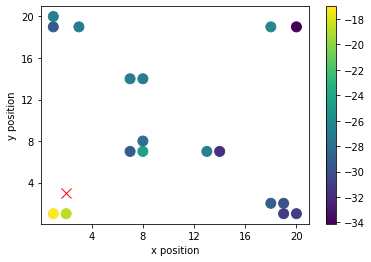

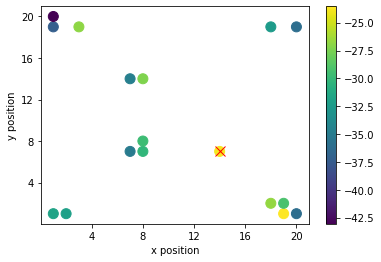

In [7]:
mx = 20*np.log10(np.max(res))
mn = 20*np.log10(np.min(res))

tx_list = ['2-3','14-7']
for i in range(len(tx_list)):
    
    tx=tx_list[i]
    vl = res[i,:]
    plt.figure()
    plot_colormap(tx,rx_list,vl)



In [8]:
print(tx_list)
print(res.tolist())
print(rx_list)

['2-3', '14-7']
[[0.1411125765226348, 0.03408164170902975, 0.04569202044045453, 0.046209078658452356, 0.02599578524527884, 0.048926472502450746, 0.03492458764523138, 0.027946664080318415, 0.032489924491469716, 0.1152345917951323, 0.02849697122124349, 0.01971725123553404, 0.04485005794454564, 0.04574991178558334, 0.03475326173490308, 0.04445526309787824, 0.059852598735866104, 0.039757986459215536], [0.02579040251728463, 0.01380680280484979, 0.007034188930244671, nan, 0.06454672465529625, 0.02397670604412826, 0.04629690585435064, 0.0665453991359601, 0.034788588841798904, 0.02507289887502206, 0.015660120849517116, 0.01569235825025861, 0.04524999192520308, 0.018340459614765537, 0.01780857720923354, 0.042975867119089683, 0.03091463456905717, 0.03295582590763415]]
['1-1', '1-19', '1-20', '13-7', '14-7', '18-19', '18-2', '19-1', '19-2', '2-1', '20-1', '20-19', '3-19', '7-14', '7-7', '8-14', '8-7', '8-8']
